## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

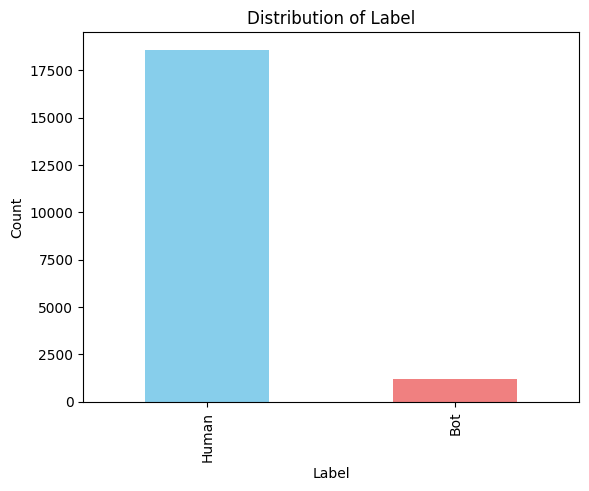

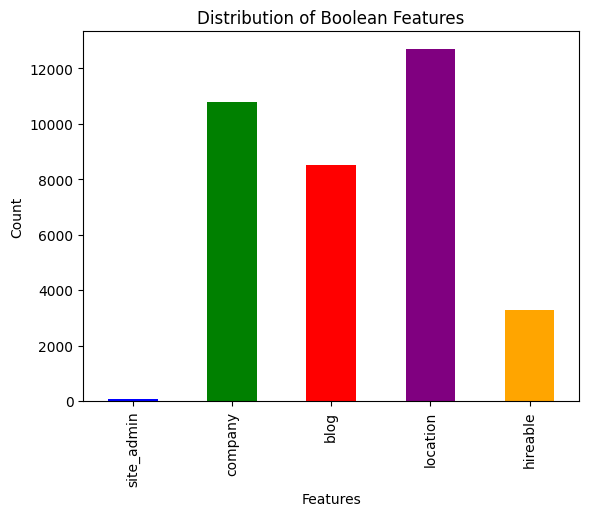

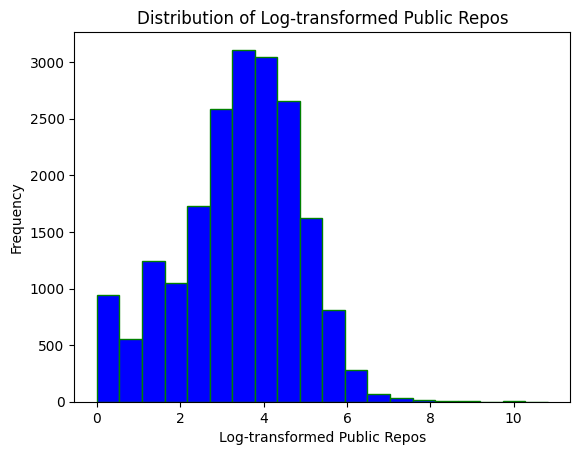

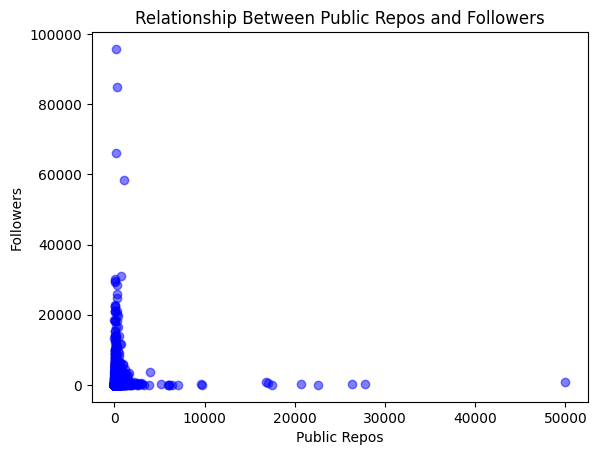

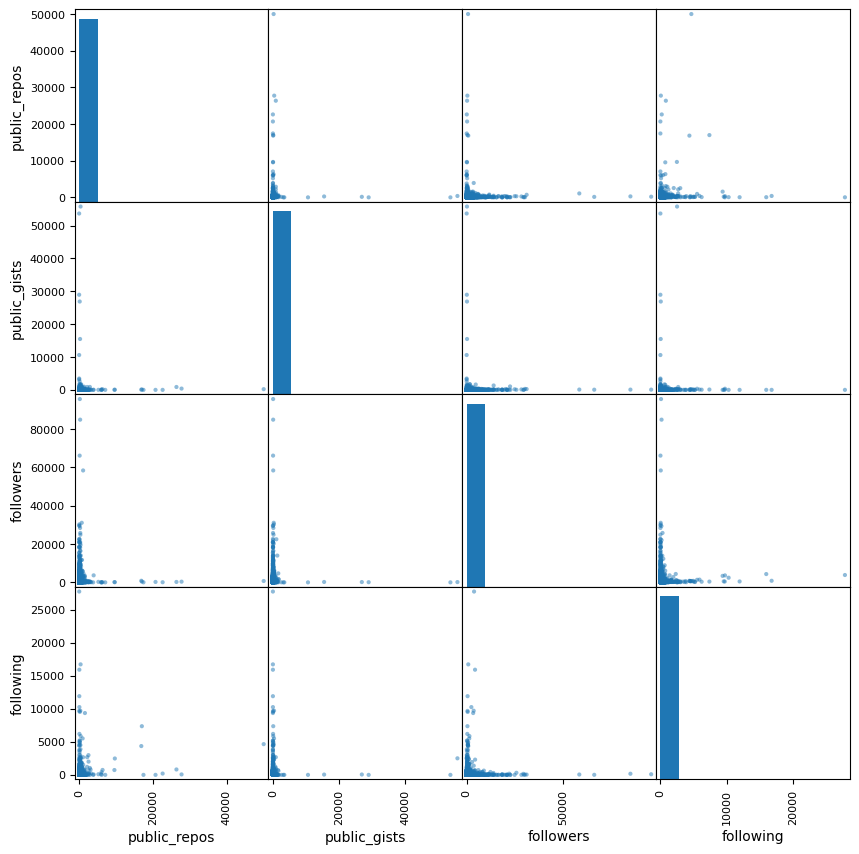

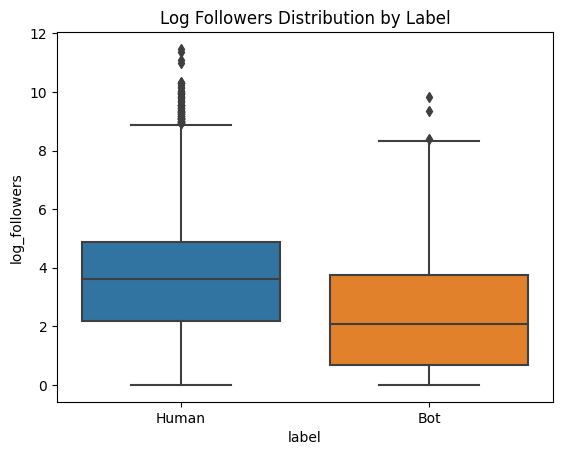

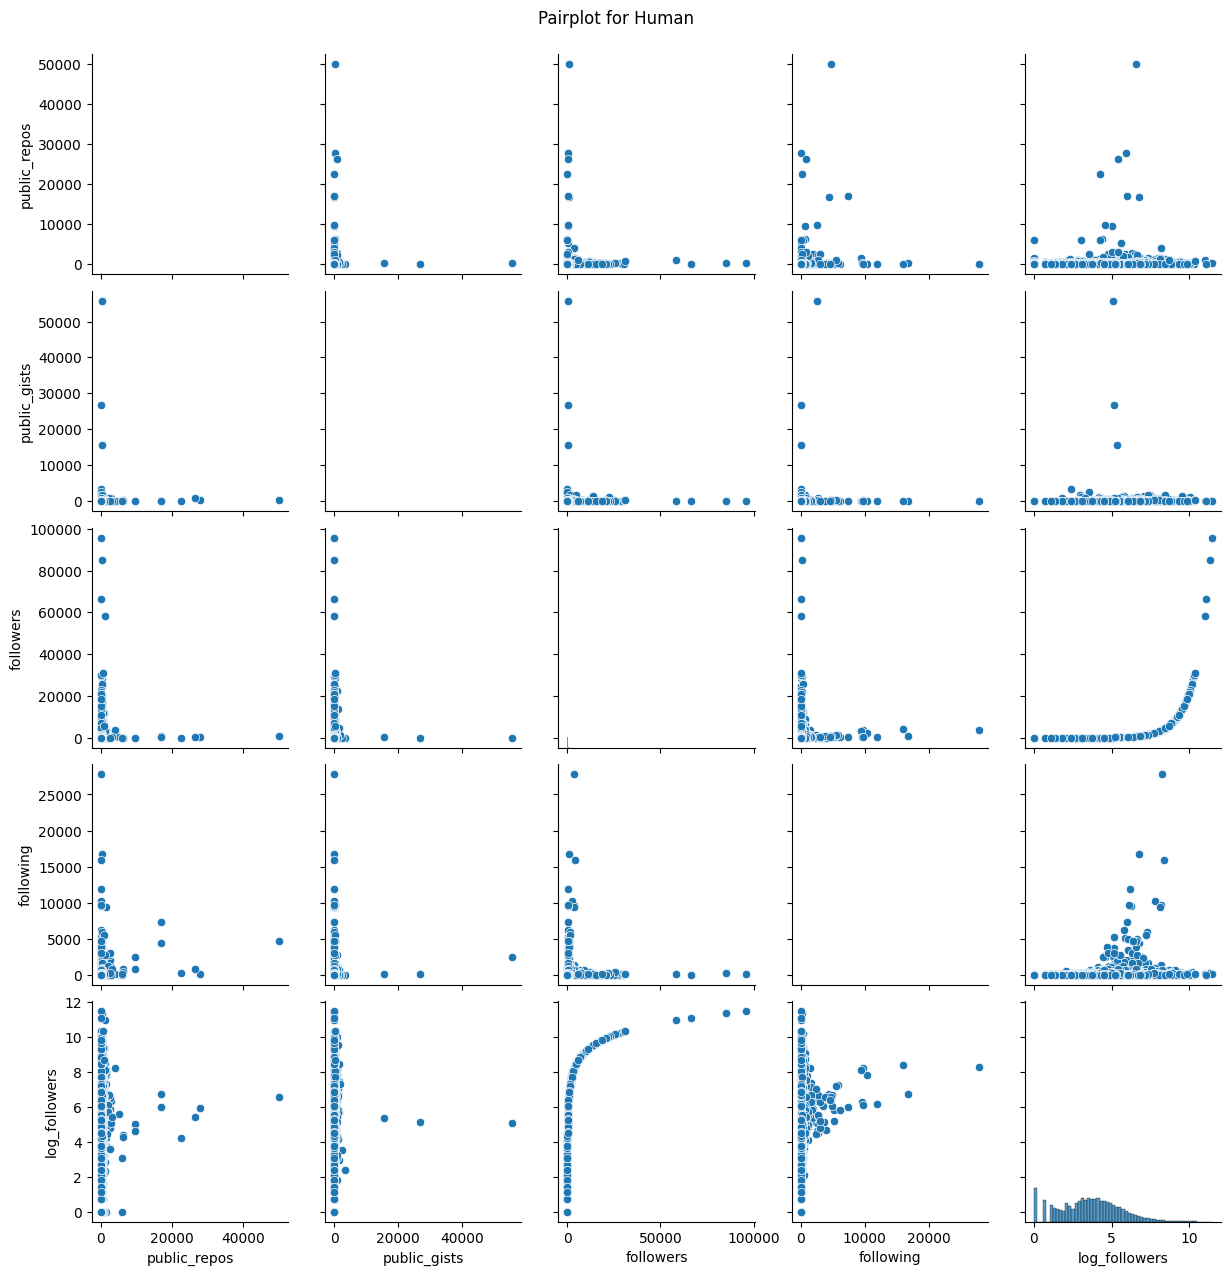

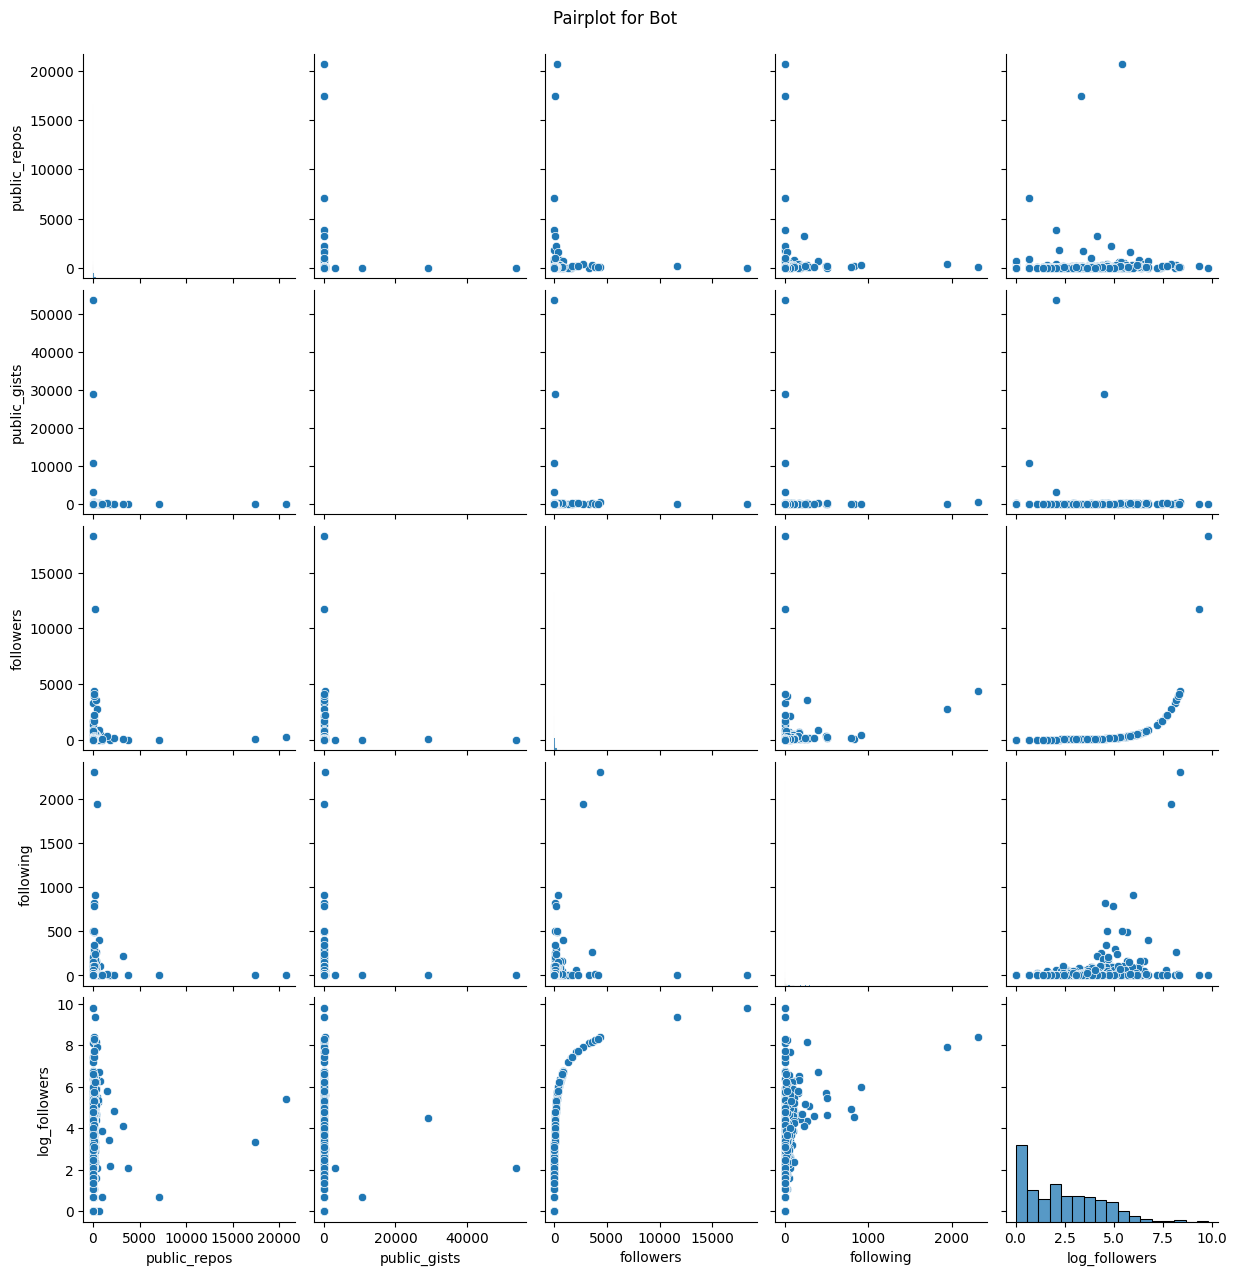

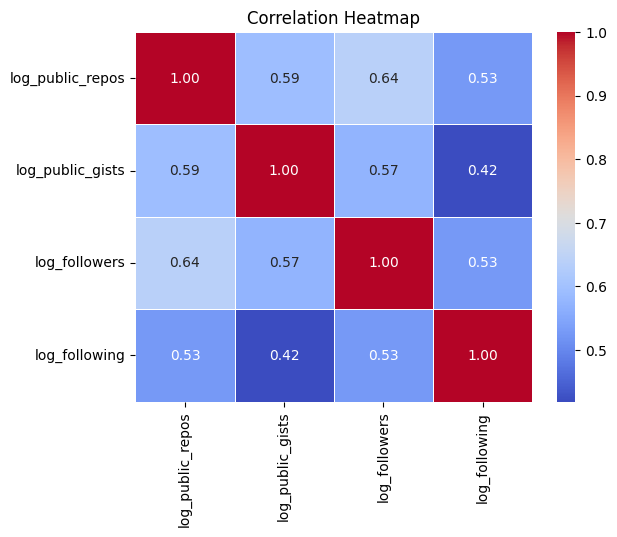

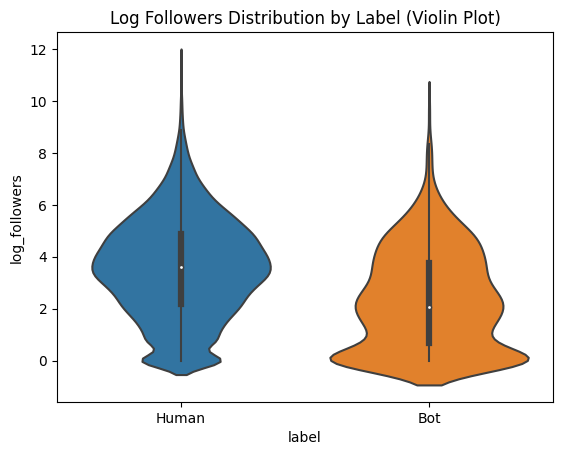

c:\Users\王志鸿\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\王志鸿\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:111: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 35.72it/s]


In [1]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\王志鸿\Desktop\导论\github_bot_processed_data.csv"

# 读取数据集
df = pd.read_csv(file_path)

# 查看数据前几行
print(df.head())

# 查看数据的信息
print(df.info())

# 生成描述性统计信息
print(df.describe())

df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])


df['public_gists'] = pd.to_numeric(df['public_gists'], errors='coerce')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
df['following'] = pd.to_numeric(df['following'], errors='coerce')
df['public_repos'] = pd.to_numeric(df['public_repos'], errors='coerce')

# 对指定列进行对数变换
df['log_public_repos'] = np.log1p(df['public_repos']) 
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])


import matplotlib.pyplot as plt

# 绘制条形图
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 绘制堆积柱状图
df[['site_admin', 'company', 'blog', 'location', 'hireable']].astype(int).sum().plot(kind='bar', stacked=True, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Distribution of Boolean Features')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

# 绘制直方图
plt.hist(df['log_public_repos'].dropna(), bins=20, color='blue', edgecolor='green')
plt.title('Distribution of Log-transformed Public Repos')
plt.xlabel('Log-transformed Public Repos')
plt.ylabel('Frequency')
plt.show()

# 绘制散点图
plt.scatter(df['public_repos'], df['followers'], alpha=0.5, color='b')
plt.title('Relationship Between Public Repos and Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

from pandas.plotting import scatter_matrix

# 选择数值型特征列进行散点矩阵绘制
df_clean = df[['public_repos', 'public_gists', 'followers', 'following']].fillna(0)
scatter_matrix(df_clean, figsize=(10, 10), diagonal='hist')
plt.show()


import seaborn as sns

# 绘制箱线图
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('Log Followers Distribution by Label')
plt.show()

# 绘制成对图，按照`label`进行分类成两类，一类是human的成对图，一类是bot的成对图
df_cleaned = df.dropna(subset=['public_repos', 'public_gists', 'followers', 'following', 'log_followers'])
df_cleaned['label'] = df_cleaned['label'].str.strip().str.capitalize()

# 过滤出 'Human' 和 'Bot' 类的数据
df_human = df_cleaned[df_cleaned['label'] == 'Human']
df_bot = df_cleaned[df_cleaned['label'] == 'Bot']

# 绘制 Human 类的成对图
sns.pairplot(df_human[['public_repos', 'public_gists', 'followers', 'following', 'log_followers']])
plt.suptitle('Pairplot for Human', y=1.02)
plt.show()

# 绘制 Bot 类的成对图
sns.pairplot(df_bot[['public_repos', 'public_gists', 'followers', 'following', 'log_followers']])
plt.suptitle('Pairplot for Bot', y=1.02)
plt.show()


# 计算相关性矩阵
correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()

# 绘制热图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 绘制小提琴图
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('Log Followers Distribution by Label (Violin Plot)')
plt.show()

from pandas_profiling import ProfileReport

# 生成交互式分析报告
profile = ProfileReport(df, title='GitHub Bot Data Report', explorative=True)

# 输出报告到HTML文件
profile.to_file('github_bot_analysis_report.html')



### 分析数据的统计分布、缺失值、异常值等：

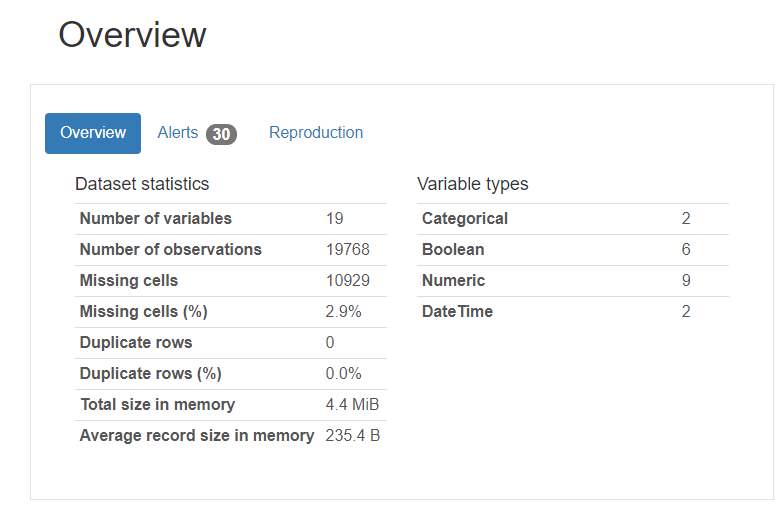
1. 统计分布

- 变量类型

报告中列出了各种变量类型，包括数值型（Numeric）、布尔型（Boolean）、日期时间型（DateTime）等。每种类型的变量数量在报告的 “Variable types” 部分列出。

分类变量（Categorical）：2

布尔变量（Boolean）：6

数值变量（Numeric）：9

日期时间变量（DateTime）：2


- 数据概况（Overview）

变量数量（Number of variables）：19

观测数量（Number of observations）：19768

缺失单元格数量（Missing cells）：10929

缺失单元格百分比（Missing cells (%)）：2.9%

重复行数量（Duplicate rows）：0

重复行百分比（Duplicate rows (%)）：0.0%

内存总大小（Total size in memory）：4.4 MiB

内存中平均记录大小（Average record size in memory）：235.4 B

- 变量统计（Variables）

每个变量的统计信息包括不同值的数量（Distinct）、缺失值数量（Missing）、无穷值数量（Infinite）、均值（Mean）等。
例如，变量 “log_followers” 有 1598 个不同值，占比 8.1%，没有缺失值，均值为 3.5025164，内存大小为 154.6 KiB。

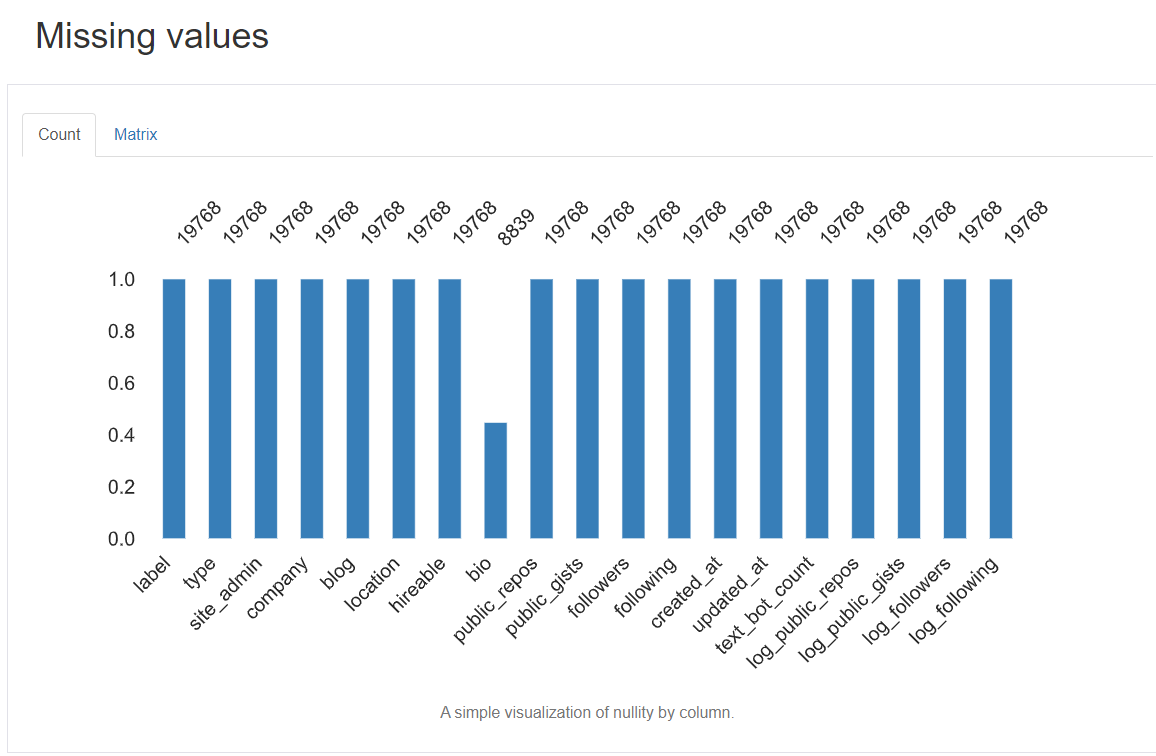

2. 缺失值

- 总体缺失值

整个数据集的缺失单元格数量为 10929 个，占比 2.9%。

- 变量缺失值

bio变量缺失值为10929，占它全部的55.3%

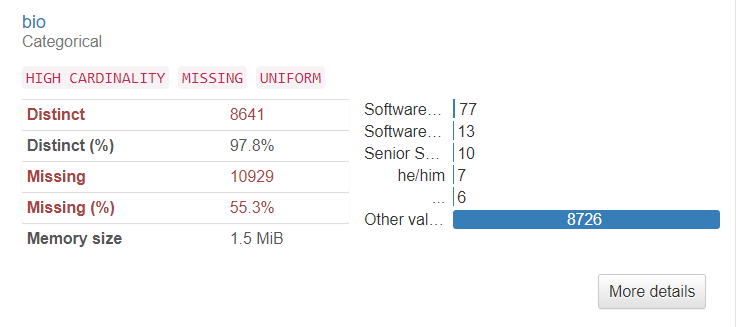

3. 异常值

- 高相关性（High Correlation）

  public_repos：与 public_gists、followers、following、log_public_repos、log_public_gists、log_followers、log_following 有高相关性。
 
  public_gists：与 public_repos、followers、log_public_repos、log_public_gists、log_followers 有高相关性。
  
  followers：与 public_repos、public_gists、following、log_public_repos、log_public_gists、log_followers、log_following 有高相关性。
  
  following：与 public_repos、followers、log_public_repos、log_followers、log_following 有高相关性。
  
  text_bot_count：与 label、type 有高相关性。

  log_public_repos：与 public_repos、public_gists、followers、following、log_public_gists、log_followers、log_following 有高相关性。
  
  log_public_gists：与 public_repos、public_gists、followers、log_public_repos、log_followers 有高相关性。

  log_followers：与 public_repos、public_gists、followers、following、log_public_repos、log_public_gists、log_following 有高相关性。

  log_following：与 public_repos、followers、following、log_public_repos、log_followers 有高相关性。

- 零值（Zeros）

  以下变量被标记了零值过高：

  public_repos：有 942 个零值，占比 4.8%。

  public_gists：有 7961 个零值，占比 40.3%。

  followers：有 1445 个零值，占比 7.3%。

  following：有 6017 个零值，占比 30.4%。

  text_bot_count：有 19003 个零值，占比 96.1%。

  log_public_repos：有 942 个零值，占比 4.8%。
  
  log_public_gists：有 7961 个零值，占比 40.3%。

  log_followers：有 1445 个零值，占比 7.3%。
  
  log_following：有 6017 个零值，占比 30.4%。

![GitHub Bot Data Report.png](<attachment:GitHub Bot Data Report.png>)
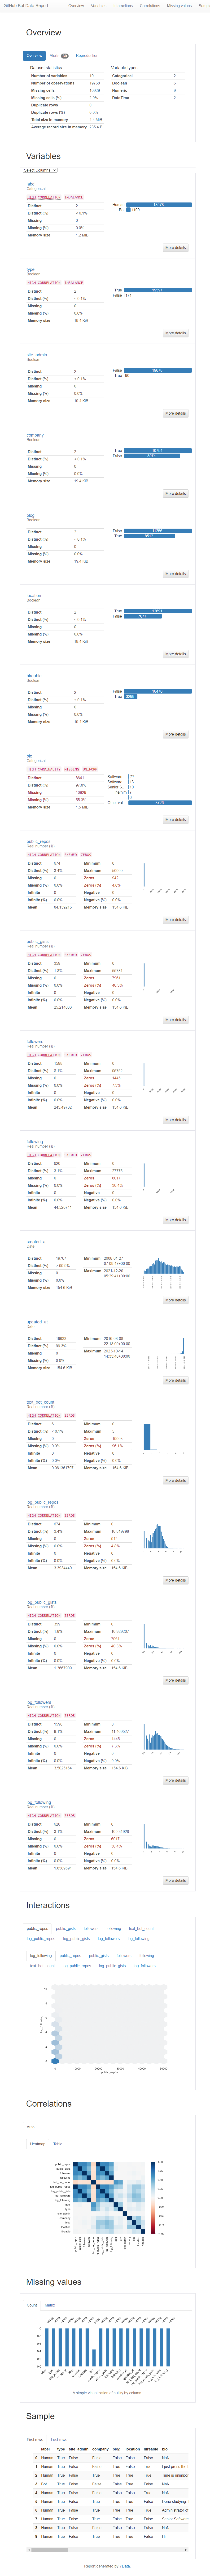